In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

In [3]:
apple = pd.read_csv('AAPL.csv')
apple.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-19,18.536785,18.692142,18.498928,18.555357,16.267323,208938800
1,2013-11-20,18.543928,18.586430,18.368929,18.392857,16.124868,193916800
2,2013-11-21,18.485714,18.614643,18.345358,18.612143,16.317104,262026800
3,2013-11-22,18.554285,18.648571,18.518929,18.564285,16.275158,223725600
4,2013-11-25,18.607857,18.781071,18.607143,18.705000,16.398516,229311600


In [4]:
# Select the feature Adj Close
data = apple['Adj Close'].values.reshape(-1, 1)

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)


In [5]:
# Define functions, convert time series data into a dataset suitable for RNNS
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Set time step
time_steps = 60

# Create an RNN input data set
X, Y = create_dataset(data_normalized, time_steps)

In [6]:
# Divide the data set into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size = 0.3, shuffle = False)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, shuffle = False)

In [7]:
# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape = (time_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training model
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, epochs = 20, batch_size = 32, validation_data = (X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)), Y_validation))



Epoch 1/20
54/54 [==============================] - 2s 13ms/step - loss: 0.0042 - val_loss: 0.0075
Epoch 2/20
54/54 [==============================] - 0s 8ms/step - loss: 2.3155e-04 - val_loss: 0.0053
Epoch 3/20
54/54 [==============================] - 0s 8ms/step - loss: 2.0847e-04 - val_loss: 0.0054
Epoch 4/20
54/54 [==============================] - 0s 8ms/step - loss: 2.0270e-04 - val_loss: 0.0034
Epoch 5/20
54/54 [==============================] - 0s 9ms/step - loss: 1.6656e-04 - val_loss: 0.0023
Epoch 6/20
54/54 [==============================] - 0s 8ms/step - loss: 1.5578e-04 - val_loss: 0.0018
Epoch 7/20
54/54 [==============================] - 0s 8ms/step - loss: 1.5143e-04 - val_loss: 0.0026
Epoch 8/20
54/54 [==============================] - 0s 8ms/step - loss: 1.2957e-04 - val_loss: 0.0016
Epoch 9/20
54/54 [==============================] - 0s 8ms/step - loss: 1.2256e-04 - val_loss: 0.0023
Epoch 10/20
54/54 [==============================] - 0s 8ms/step - loss: 1.2767e-04 -

In [8]:
# Make predictions on validation sets
predictions = model.predict(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)))
predictions = scaler.inverse_transform(predictions)

# Calculate the RMSE on verification set
rmse_validation = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].values, predictions))
print(f'RMSE on validation set: {rmse_validation}')

# Make predictions on the test set
predictions_test = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predictions_test = scaler.inverse_transform(predictions_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values, predictions_test))
print(f'RMSE on test set: {rmse_test}')

12/12 [==============================] - 0s 3ms/step
RMSE on validation set: 5.006373772708056
12/12 [==============================] - 0s 3ms/step
RMSE on test set: 6.909449393177911


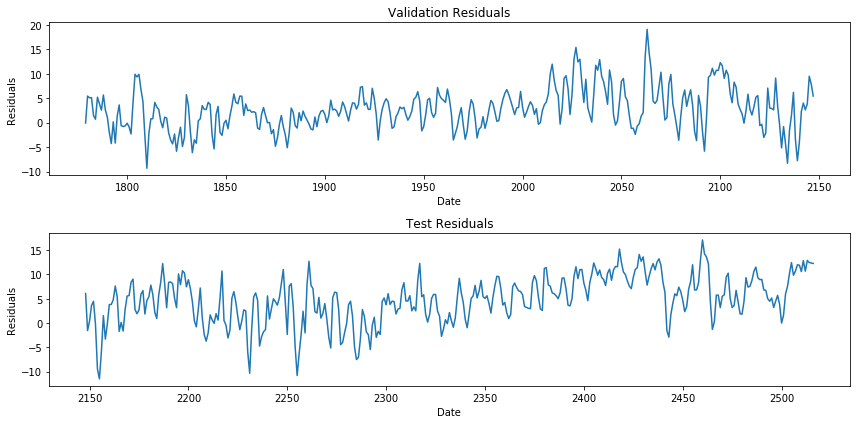

In [9]:
# Calculated residual
residuals_validation = apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].values - predictions.flatten()
residuals_test = apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values - predictions_test.flatten()

# Plot residuals
plt.figure(figsize = (12, 6))
plt.subplot(2, 1, 1)
plt.plot(apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].index, residuals_validation, label='Validation Residuals')
plt.title('Validation Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.subplot(2, 1, 2)
plt.plot(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].index, residuals_test, label='Test Residuals')
plt.title('Test Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

Different hidden layer sizes

Epoch 1/20
54/54 [==============================] - 2s 11ms/step - loss: 5.4731e-04 - val_loss: 0.0026
Epoch 2/20
54/54 [==============================] - 0s 7ms/step - loss: 1.3594e-04 - val_loss: 0.0017
Epoch 3/20
54/54 [==============================] - 0s 7ms/step - loss: 1.2167e-04 - val_loss: 0.0019
Epoch 4/20
54/54 [==============================] - 0s 7ms/step - loss: 1.1808e-04 - val_loss: 0.0036
Epoch 5/20
54/54 [==============================] - 0s 7ms/step - loss: 1.1244e-04 - val_loss: 0.0015
Epoch 6/20
54/54 [==============================] - 0s 7ms/step - loss: 9.4997e-05 - val_loss: 9.7991e-04
Epoch 7/20
54/54 [==============================] - 0s 7ms/step - loss: 8.8254e-05 - val_loss: 0.0041
Epoch 8/20
54/54 [==============================] - 0s 7ms/step - loss: 9.0394e-05 - val_loss: 0.0012
Epoch 9/20
54/54 [==============================] - 0s 7ms/step - loss: 8.1019e-05 - val_loss: 0.0014
Epoch 10/20
54/54 [==============================] - 0s 7ms/step - loss: 7.62

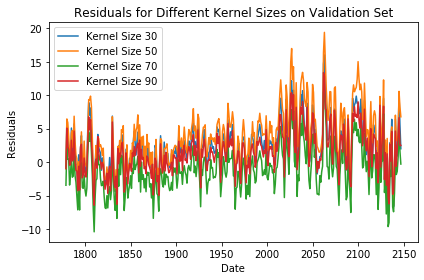

RMSE for kernel size 30: 4.223615559509774
RMSE for kernel size 50: 5.751578740911445
RMSE for kernel size 70: 3.5203423944824714
RMSE for kernel size 90: 3.554603995416734
Best kernel size: 70
Best RMSE on validation set: 3.5203423944824714


In [26]:
# Try different kernel sizes
kernel_sizes = [30, 50, 70, 90]
best_rmse = float('inf')
best_kernel_size = None
all_rmse = []

# Train and test different kernel sizes on validation sets
for kernel_size in kernel_sizes:
    model = Sequential()
    model.add(SimpleRNN(units=kernel_size, input_shape=(time_steps, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training model
    model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, epochs=20, batch_size=32, validation_data=(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)), Y_validation))
        
    # Make predictions on validation sets
    predictions_validation = model.predict(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)))
    predictions_validation = scaler.inverse_transform(predictions_validation)

    # Calculate the RMSE on verification set
    rmse_validation = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].values, predictions_validation))
    all_rmse.append(rmse_validation)

    # Calculated residual
    residuals_validation = apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].values - predictions_validation.flatten()

    # Plot residuals
    plt.plot(apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].index, residuals_validation, label=f'Kernel Size {kernel_size}')


    # Best preserved model
    if rmse_validation < best_rmse:
        best_rmse = rmse_validation
        best_kernel_size = kernel_size
        best_model = model

plt.title('Residuals for Different Kernel Sizes on Validation Set')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()


# Output all kernel-sized RMses
for i, kernel_size in enumerate(kernel_sizes):
    print(f'RMSE for kernel size {kernel_size}: {all_rmse[i]}')

# Output optimal kernel size
print(f'Best kernel size: {best_kernel_size}')
print(f'Best RMSE on validation set: {best_rmse}')

12/12 [==============================] - 0s 4ms/step
RMSE on test set using best model: 3.7726112706155335


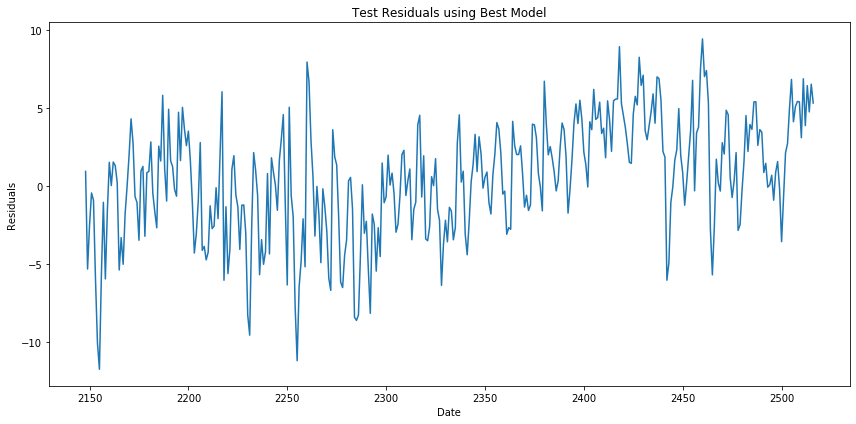

In [27]:
# Make predictions on the test set
predictions_test = best_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predictions_test = scaler.inverse_transform(predictions_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values, predictions_test))
print(f'RMSE on test set using best model: {rmse_test}')

# Calculate the residuals on the test set
residuals_test = apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values - predictions_test.flatten()


# Plot the residuals on the test set
plt.figure(figsize=(12, 6))
plt.plot(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].index, residuals_test, label='Test Residuals')
plt.title('Test Residuals using Best Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

Different number of RNN layers 

Epoch 1/20
54/54 [==============================] - 3s 18ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 2/20
54/54 [==============================] - 1s 13ms/step - loss: 3.3383e-04 - val_loss: 0.0056
Epoch 3/20
54/54 [==============================] - 1s 13ms/step - loss: 2.3544e-04 - val_loss: 0.0046
Epoch 4/20
54/54 [==============================] - 1s 12ms/step - loss: 1.8807e-04 - val_loss: 0.0020
Epoch 5/20
54/54 [==============================] - 1s 14ms/step - loss: 1.7489e-04 - val_loss: 0.0043
Epoch 6/20
54/54 [==============================] - 1s 12ms/step - loss: 1.4287e-04 - val_loss: 0.0021
Epoch 7/20
54/54 [==============================] - 1s 12ms/step - loss: 1.5142e-04 - val_loss: 0.0028
Epoch 8/20
54/54 [==============================] - 1s 11ms/step - loss: 1.6058e-04 - val_loss: 0.0012
Epoch 9/20
54/54 [==============================] - 1s 11ms/step - loss: 1.1818e-04 - val_loss: 0.0010
Epoch 10/20
54/54 [==============================] - 1s 12ms/step - loss: 1.1

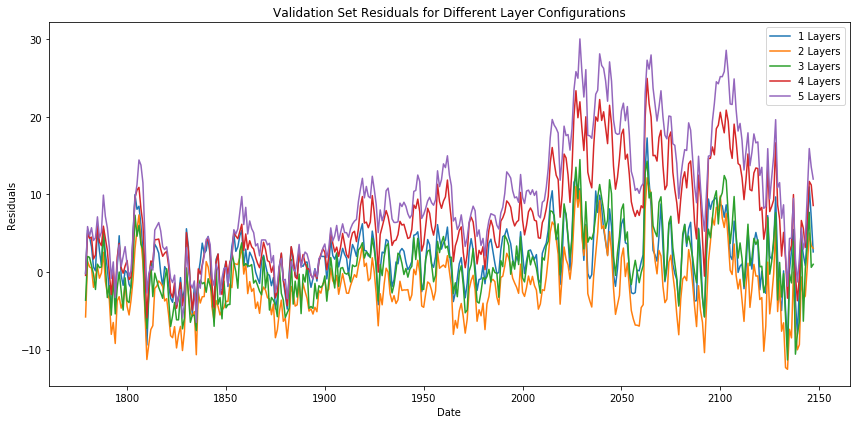

RMSE for 1 layers: 4.240088210558976
RMSE for 2 layers: 4.519882590687807
RMSE for 3 layers: 4.478244639162438
RMSE for 4 layers: 9.185016377241935
RMSE for 5 layers: 12.13968905975933
Best number of layers: 1
Best RMSE on validation set: 4.240088210558976


In [90]:
data1 = apple['Adj Close'].values.reshape(-1, 1)

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized1 = scaler.fit_transform(data1)


# Define function to convert time series data into RNN-compatible dataset
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Set time steps
time_steps = 60

# Create RNN input dataset
X, Y = create_dataset(data_normalized1, time_steps)

# Split dataset into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, shuffle=False)

#Set kernel size
kernel_size = 70

# Try different numbers of layers
layer_configs = [1, 2, 3, 4, 5]
best_rmse = float('inf')
best_num_layers = None
best_model = None
all_rmse = []

# Lists to store residuals for each layer configuration
residuals_per_layer = []

# Train and test models with different numbers of layers
for num_layers in layer_configs:
    model = Sequential()
    for _ in range(num_layers - 1):
        model.add(SimpleRNN(units=kernel_size, return_sequences=True, input_shape=(time_steps, 1)))
    model.add(SimpleRNN(units=kernel_size))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train model
    model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, epochs=20, batch_size=32,
              validation_data=(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)), Y_validation))

    # Predictions on validation set
    predictions_validation = model.predict(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)))
    predictions_validation = scaler.inverse_transform(predictions_validation)

    # Calculate RMSE on validation set
    rmse_validation = np.sqrt(mean_squared_error(
        apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].values,
        predictions_validation))
    all_rmse.append(rmse_validation)

    # Calculate residuals on validation set
    residuals_validation = apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].values - predictions_validation.flatten()

    # Append residuals to the list
    residuals_per_layer.append(residuals_validation)

    # Save the best model
    if rmse_validation < best_rmse:
        best_rmse = rmse_validation
        best_num_layers = num_layers
        best_model = model

# Plot residuals on validation set for different layer configurations
plt.figure(figsize=(12, 6))
for i, num_layers in enumerate(layer_configs):
    plt.plot(apple['Adj Close'][time_steps + len(X_train):time_steps + len(X_train) + len(X_validation)].index,
             residuals_per_layer[i], label=f'{num_layers} Layers')

plt.title('Validation Set Residuals for Different Layer Configurations')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

# Output RMSE for different numbers of layers
for i, num_layers in enumerate(layer_configs):
    print(f'RMSE for {num_layers} layers: {all_rmse[i]}')

# Output best model information
print(f'Best number of layers: {best_num_layers}')
print(f'Best RMSE on validation set: {best_rmse}')

12/12 [==============================] - 0s 6ms/step
RMSE on test set using the best model: 5.464197808042173


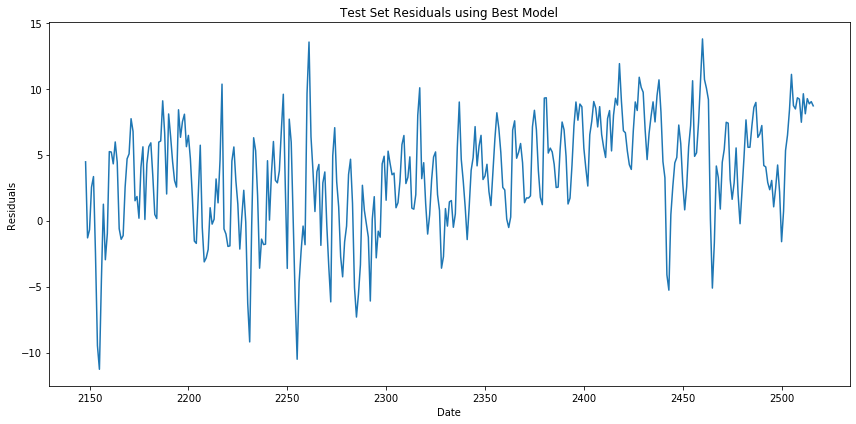

In [91]:
# Predictions on test set using the best model
predictions_test = best_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predictions_test = scaler.inverse_transform(predictions_test)

# Calculate RMSE on test set
rmse_test = np.sqrt(mean_squared_error(
    apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values, predictions_test))
print(f'RMSE on test set using the best model: {rmse_test}')

# Calculate residuals on test set
residuals_test = apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values - predictions_test.flatten()

# Plot residuals on test set
plt.figure(figsize=(12, 6))
plt.plot(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].index, residuals_test,
         label='Test Set Residuals')
plt.title('Test Set Residuals using Best Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

Different time steps

Epoch 1/20
55/55 [==============================] - 2s 12ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 2/20
55/55 [==============================] - 0s 8ms/step - loss: 1.0735e-04 - val_loss: 0.0012
Epoch 3/20
55/55 [==============================] - 0s 8ms/step - loss: 1.1613e-04 - val_loss: 9.3305e-04
Epoch 4/20
55/55 [==============================] - 0s 8ms/step - loss: 9.1841e-05 - val_loss: 0.0010
Epoch 5/20
55/55 [==============================] - 0s 8ms/step - loss: 8.5675e-05 - val_loss: 0.0018
Epoch 6/20
55/55 [==============================] - 0s 8ms/step - loss: 8.4050e-05 - val_loss: 7.1236e-04
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 7.3139e-05 - val_loss: 5.6899e-04
Epoch 8/20
55/55 [==============================] - 0s 8ms/step - loss: 9.0137e-05 - val_loss: 5.8588e-04
Epoch 9/20
55/55 [==============================] - 0s 7ms/step - loss: 8.4150e-05 - val_loss: 9.5550e-04
Epoch 10/20
55/55 [==============================] - 0s 7ms/step 

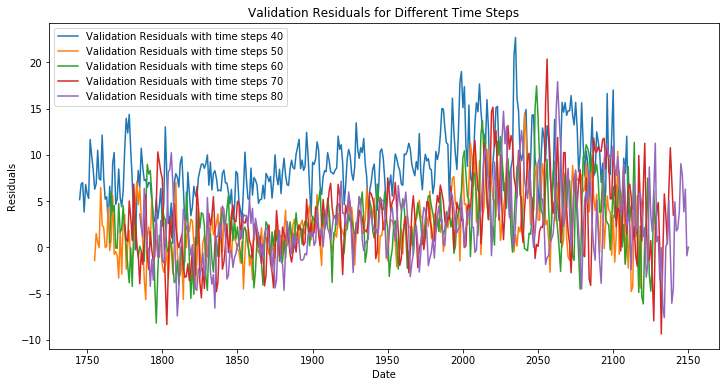

RMSE for each timestep:
RMSE for 40 timestep: 9.384405955850623
RMSE for 50 timestep: 4.024452631247327
RMSE for 60 timestep: 4.676874863414292
RMSE for 70 timestep: 5.257105572534149
RMSE for 80 timestep: 4.726078331475145
Best kernel size: 50
Best RMSE on validation set: 4.024452631247327


In [98]:
data2 = apple['Adj Close'].values.reshape(-1, 1)

# Data normalization
scaler2 = MinMaxScaler(feature_range=(0, 1))
data_normalized2 = scaler2.fit_transform(data2)

# Define functions, convert time series data into a dataset suitable for RNNS
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Try different time steps
time_steps_list = [40, 50, 60, 70, 80]

best_model = None
best_rmse_validation = float('inf')
best_time_steps = None
all_residuals_validation = []
all_rmse_validation = []  
all_rmse_test = []

for time_steps in time_steps_list:
    # Create an RNN input data set
    X, Y = create_dataset(data_normalized2, time_steps)

    # Divide the data set into training, validation, and test sets
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, shuffle=False)
    X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, shuffle=False)

    # Define the RNN model
    model = Sequential()
    model.add(SimpleRNN(units=70, input_shape=(time_steps, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')


    # Training model
    model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, epochs=20, batch_size=32, validation_data=(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)), Y_validation))

    # Make predictions on validation sets
    predictions = model.predict(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)))
    predictions = scaler.inverse_transform(predictions)

    # Calculate the RMSE on verification set
    rmse_validation = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+len(X_validation)].values, predictions))
    all_rmse_validation.append(rmse_validation)  # Save RMSE for each validation set

    # Calculated residual
    residuals_validation = apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+len(X_validation)].values - predictions.flatten()
    all_residuals_validation.append(residuals_validation)

    # Best preserved model
    if rmse_validation < best_rmse_validation:
        best_rmse_validation = rmse_validation
        best_model = model
        best_time_steps = time_steps



# Output the test set RMSE for the optimal model, use the best model to make predictions
X_test_best, Y_test_best = create_dataset(data_normalized, time_steps=best_model.input_shape[1])
predictions_test_best = best_model.predict(X_test_best.reshape((X_test_best.shape[0], X_test_best.shape[1], 1)))
predictions_test_best = scaler.inverse_transform(predictions_test_best)

# Make sure the test sets are the same length
length = min(len(Y_test_best), len(predictions_test_best))
Y_test_best = Y_test_best[:length]
predictions_test_best = predictions_test_best[:length]



# Plot the residuals of the optimal model
plt.figure(figsize=(12, 6))
max_len = min(len(X_train), len(X_validation), len(all_residuals_validation[0]))

for i, time_steps in enumerate(time_steps_list):
    plt.plot(apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+max_len].index, all_residuals_validation[i][:max_len], label=f'Validation Residuals with time steps {time_steps}')

plt.title('Validation Residuals for Different Time Steps')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# Output the RMSE for each validation set
print("RMSE for each timestep:")
for i, time_steps in enumerate(time_steps_list):
    print(f'RMSE for {time_steps} timestep: {all_rmse_validation[i]}')


# Output optimal time steps
print(f'Best kernel size: {best_time_steps}')
print(f'Best RMSE on validation set: {best_rmse_validation}')

12/12 [==============================] - 0s 5ms/step
RMSE on test set using best model: 6.54726839140165


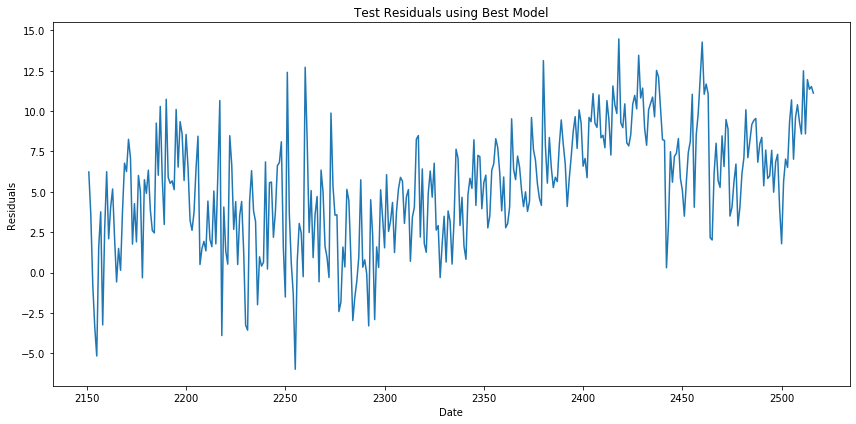

In [99]:
predictions_test = best_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predictions_test = scaler.inverse_transform(predictions_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values, predictions_test))
print(f'RMSE on test set using best model: {rmse_test}')

# Calculate the residuals on the test set
residuals_test = apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values - predictions_test.flatten()

# Plot the residuals on the test set
plt.figure(figsize=(12, 6))
plt.plot(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].index, residuals_test, label='Test Residuals')
plt.title('Test Residuals using Best Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

Comparison between RNN model and LSTM model

Epoch 1/20
54/54 [==============================] - 4s 33ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 2/20
54/54 [==============================] - 1s 25ms/step - loss: 1.7518e-04 - val_loss: 0.0012
Epoch 3/20
54/54 [==============================] - 1s 26ms/step - loss: 1.4841e-04 - val_loss: 0.0011
Epoch 4/20
54/54 [==============================] - 1s 25ms/step - loss: 1.5666e-04 - val_loss: 0.0018
Epoch 5/20
54/54 [==============================] - 1s 25ms/step - loss: 1.7868e-04 - val_loss: 7.3513e-04
Epoch 6/20
54/54 [==============================] - 1s 25ms/step - loss: 1.3639e-04 - val_loss: 7.2241e-04
Epoch 7/20
54/54 [==============================] - 1s 26ms/step - loss: 1.2348e-04 - val_loss: 6.7184e-04
Epoch 8/20
54/54 [==============================] - 1s 25ms/step - loss: 1.2263e-04 - val_loss: 8.3921e-04
Epoch 9/20
54/54 [==============================] - 1s 25ms/step - loss: 1.2142e-04 - val_loss: 7.3151e-04
Epoch 10/20
54/54 [==============================] - 1s 2

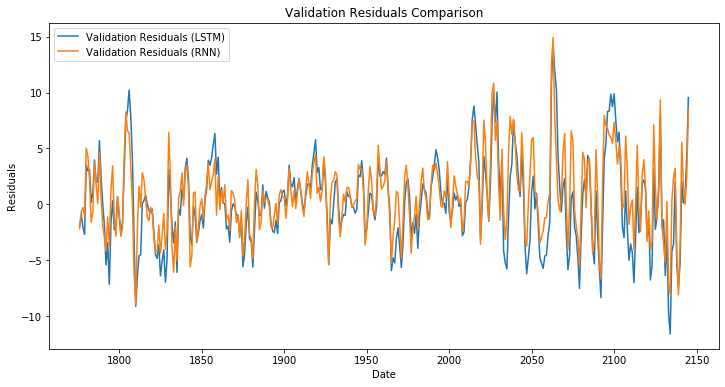

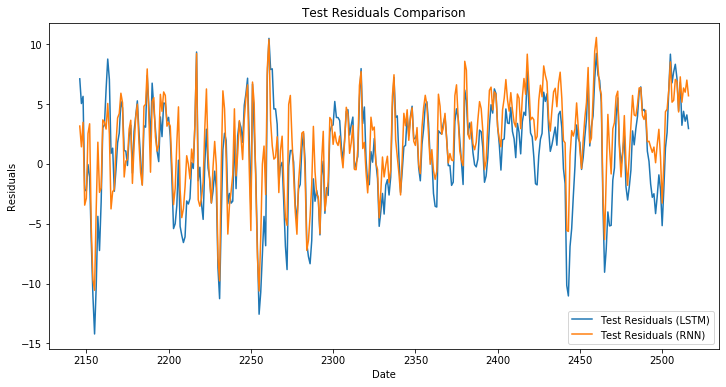

RMSE on validation set(LSTM): 3.8827330089308645
RMSE on test set(LSTM): 4.248037218801791
RMSE on validation set (RNN): 3.516525145318679
RMSE on test set (RNN): 4.185565276011795


In [104]:
from tensorflow.keras.layers import LSTM, Dense

data3 = apple['Adj Close'].values.reshape(-1, 1)

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized3 = scaler.fit_transform(data3)

# Define functions to convert time series data into a dataset suitable for LSTM
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

# Set the time step and kernel size
time_steps = 50
units = 70

# Create the LSTM input data set
X, Y = create_dataset(data_normalized3, time_steps)

# Divide the data set into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=units, input_shape=(time_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training model
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, epochs=20, batch_size=32, validation_data=(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)), Y_validation))

# Make predictions on validation sets
predictions_validation = model.predict(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)))
predictions_validation = scaler.inverse_transform(predictions_validation)

# Calculate the RMSE on verification set
rmse_validation = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+len(X_validation)].values, predictions_validation))

# Make predictions on the test set
predictions_test = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predictions_test = scaler.inverse_transform(predictions_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values, predictions_test))

# Define the RNN model with the same hyperparameters
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=units, input_shape=(time_steps, 1)))
rnn_model.add(Dense(units=1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
rnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, epochs=20, batch_size=32, validation_data=(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)), Y_validation))

# Make predictions on the validation set
predictions_validation_rnn = rnn_model.predict(X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1)))
predictions_validation_rnn = scaler.inverse_transform(predictions_validation_rnn)

# Calculate RMSE on the validation set for the RNN model
rmse_validation_rnn = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+len(X_validation)].values, predictions_validation_rnn))


# Make predictions on the test set for the RNN model
predictions_test_rnn = rnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predictions_test_rnn = scaler.inverse_transform(predictions_test_rnn)

# Calculate RMSE on the test set for the RNN model
rmse_test_rnn = np.sqrt(mean_squared_error(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values, predictions_test_rnn))


# Calculate residuals for the validation set
residuals_validation_rnn = apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+len(X_validation)].values - predictions_validation_rnn.flatten()

# Calculate residuals for the test set
residuals_test_rnn = apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values - predictions_test_rnn.flatten()

# Calculate residuals for the validation set (LSTM)
residuals_validation_lstm = apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+len(X_validation)].values - predictions_validation.flatten()

# Calculate residuals for the test set (LSTM)
residuals_test_lstm = apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].values - predictions_test.flatten()

# Plot residuals for the validation set
plt.figure(figsize=(12, 6))
plt.plot(apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+len(X_validation)].index, residuals_validation_lstm, label='Validation Residuals (LSTM)')
plt.plot(apple['Adj Close'][time_steps+len(X_train):time_steps+len(X_train)+len(X_validation)].index, residuals_validation_rnn, label='Validation Residuals (RNN)')
plt.title('Validation Residuals Comparison')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Plot residuals for the test set
plt.figure(figsize=(12, 6))
plt.plot(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].index, residuals_test_lstm, label='Test Residuals (LSTM)')
plt.plot(apple['Adj Close'][time_steps + len(X_train) + len(X_validation):].index, residuals_test_rnn, label='Test Residuals (RNN)')
plt.title('Test Residuals Comparison')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

print(f'RMSE on validation set(LSTM): {rmse_validation}')
print(f'RMSE on test set(LSTM): {rmse_test}')

print(f'RMSE on validation set (RNN): {rmse_validation_rnn}')
print(f'RMSE on test set (RNN): {rmse_test_rnn}')